Task is to 
* Import Resnet18 Model weights - [https://github.com/qubvel/classification_models]
* predict on cifar10 data - [http://www.hackevolve.com/where-cnn-is-looking-grad-cam/]
* Find 50 missclassified images
* Perform gradCAM on these 50 images

Getting necessary libs

In [1]:
!pip install image-classifiers
!pip install git+https://github.com/qubvel/classification_models.git
  
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils

     |████████████████████████████████| 81kB 3.7MB/s 
  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-sia189z9
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-sia189z9
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-mxaj3_ex/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


Using TensorFlow backend.


In [0]:
# prepare your data
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [3]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

print (train_labels.shape)

(50000, 10)


In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

Importing ResNet18 model

In [6]:
import keras
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from keras.applications.imagenet_utils import decode_predictions

from classification_models.resnet import ResNet18, preprocess_input

#X = preprocess_input()
#y = 

n_classes = num_classes #10

# build model
base_model = ResNet18(input_shape=(32,32,3), weights='imagenet', classes=10, include_top=False)

#Freezing except recent 4 layers from imported model
'''for layer in base_model.layers[:-4]:
    layer.trainable = False'''

x = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation='softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])

# Compile
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#model.fit(train_features, train_labels)

W0724 17:59:05.108226 139623069316992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 17:59:05.134029 139623069316992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 17:59:05.135017 139623069316992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0724 17:59:05.138349 139623069316992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0724 17:59:05.139223 139623

44924928/44920640 [==============================] - 1s 0us/step


W0724 17:59:09.279647 139623069316992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=97, epochs=10)`
  
W0724 17:59:09.574231 139623069316992 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructio

Epoch 1/10
97/97 [==============================] - 28s 286ms/step - loss: 1.7085 - acc: 0.4303 - val_loss: 1.3556 - val_acc: 0.5328
Epoch 2/10
97/97 [==============================] - 21s 212ms/step - loss: 1.1784 - acc: 0.5856 - val_loss: 1.1754 - val_acc: 0.6024
Epoch 3/10
97/97 [==============================] - 20s 202ms/step - loss: 1.0375 - acc: 0.6366 - val_loss: 1.0789 - val_acc: 0.6335
Epoch 4/10
97/97 [==============================] - 19s 201ms/step - loss: 0.9593 - acc: 0.6640 - val_loss: 0.9896 - val_acc: 0.6592
Epoch 5/10
97/97 [==============================] - 20s 201ms/step - loss: 0.8966 - acc: 0.6857 - val_loss: 0.9325 - val_acc: 0.6780
Epoch 6/10
97/97 [==============================] - 20s 202ms/step - loss: 0.8555 - acc: 0.6998 - val_loss: 0.8834 - val_acc: 0.6945
Epoch 7/10
97/97 [==============================] - 19s 201ms/step - loss: 0.8165 - acc: 0.7136 - val_loss: 0.8912 - val_acc: 0.6880
Epoch 8/10
97/97 [==============================] - 19s 201ms/step - 

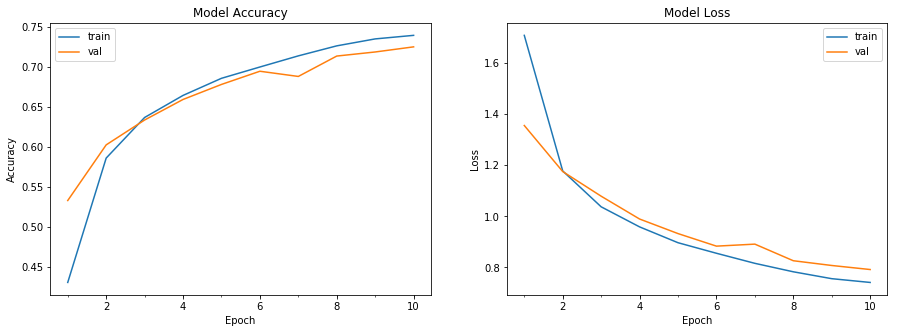

Accuracy on test data is: 72.50


In [7]:
# Train
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        rotation_range=15, width_shift_range=0.1, height_shift_range=0.1)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 512),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 10, 
                                 validation_data = (test_features, test_labels), verbose=1, 
                                 )
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
# finding missclassifide images
y_preds = model.predict(test_features)

#misclassified = np.where(np.argmax(y_preds) != np.argmax(test_labels))
#print (np.where(np.argmax(y_preds)) != np.where(np.argmax(test_labels))

Gradcam of 50 miss classified images

In [10]:
print([layer.name for layer in model.layers[0:] if "conv" in layer.name])

['conv0', 'stage1_unit1_conv1', 'stage1_unit1_conv2', 'stage1_unit2_conv1', 'stage1_unit2_conv2', 'stage2_unit1_conv1', 'stage2_unit1_conv2', 'stage2_unit2_conv1', 'stage2_unit2_conv2', 'stage3_unit1_conv1', 'stage3_unit1_conv2', 'stage3_unit2_conv1', 'stage3_unit2_conv2', 'stage4_unit1_conv1', 'stage4_unit1_conv2', 'stage4_unit2_conv1', 'stage4_unit2_conv2']


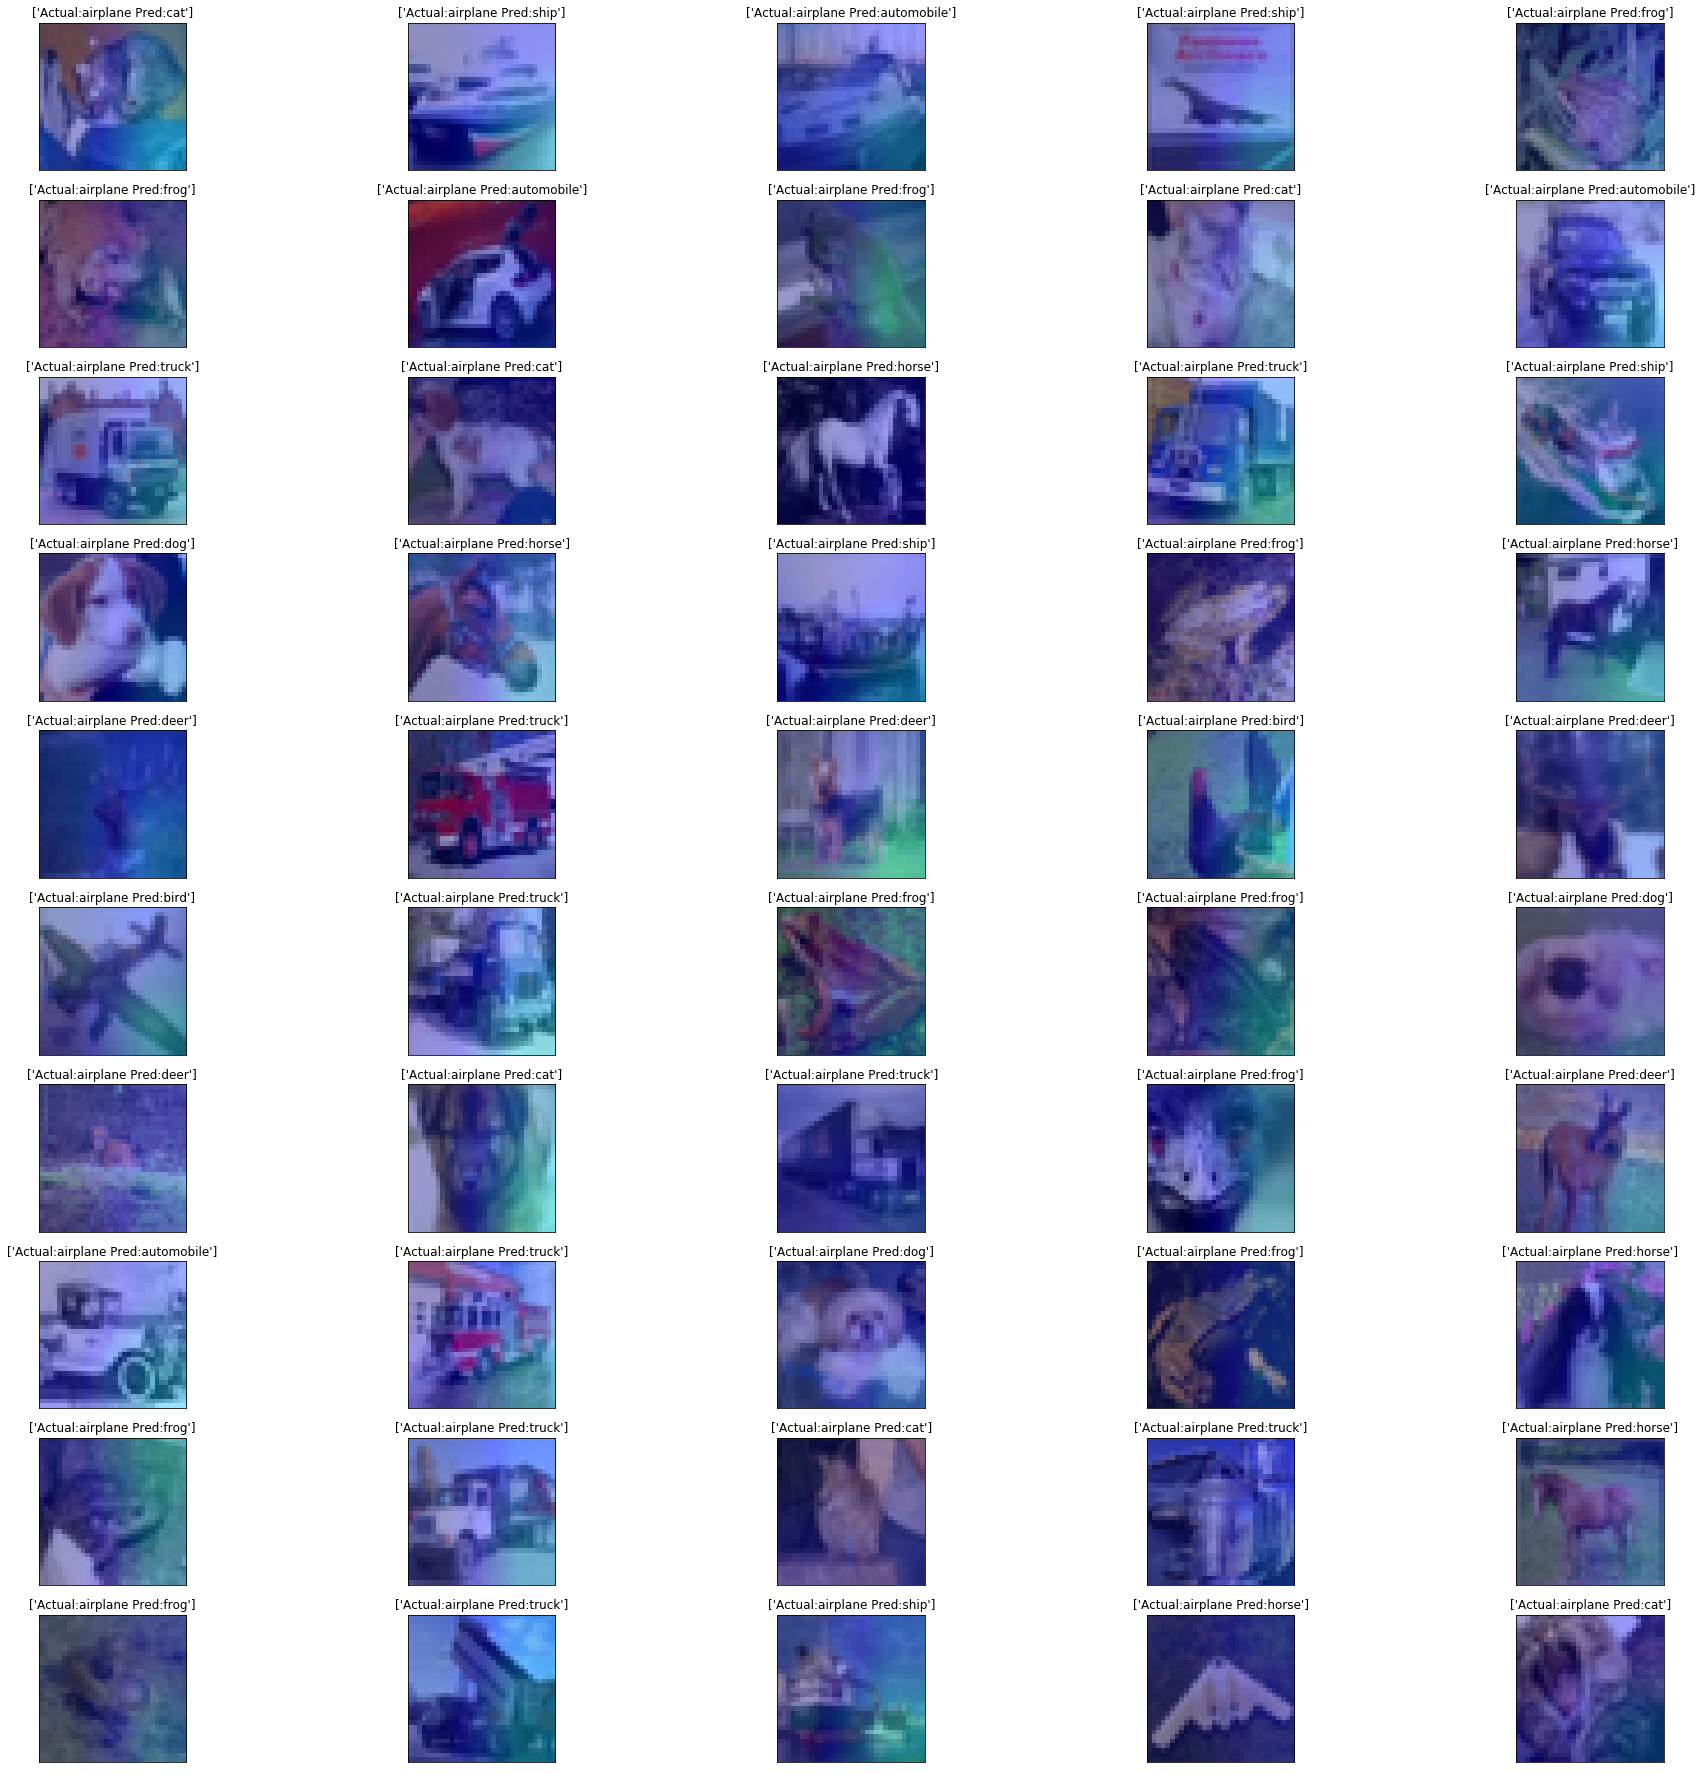

In [18]:
import cv2
from keras.preprocessing import image

#Showing gradcam of 25 miss classified images
class_names = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(32,32))

test_l = np.argmax(test_labels, axis=1)
y_l = np.argmax(y_preds, axis=1)

#last convolution layer for current model is  
last_conv_layer = model.get_layer("stage3_unit2_relu2") 

#counter of missclassified images
c = 0

for i in range(len (y_l)):
  if test_l[i] != y_l[i]:
    ax = fig.add_subplot(10, 5, 1+c, xticks=[], yticks=[])
    im = test_features[i]
    titles = [("Actual:"+class_names[test_l[i]]+" Pred:"+class_names[y_l[i]]).replace(' ', ' ')]
    ax.set_title(titles) #class_names[np.argmax(y_preds[img_num])])
    #plt.imshow(im)
    
    x = image.img_to_array(im)
    x = np.expand_dims(x, axis=0)
    class_output = model.output[:, y_l[i]]
    
    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    #print (grads)
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for i in range(10):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    
    heatmap = cv2.resize(heatmap, (im.shape[1], im.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
    superimposed_img = cv2.addWeighted(im, 0.6, heatmap, 0.4, 0)
    plt.imshow(superimposed_img)
    
    c=c+1
    if c==50:
      break
   
plt.show()